In [ ]:
# Sensor Pulse🧠| Viz & EDA for BFRB Detection
# https://www.kaggle.com/code/tarundirector/sensor-pulse-viz-eda-for-bfrb-detection

## やることリスト

- ~~完成ロードマップの作成~~
- DSインフラの構築
- 前処理
- EDA
- 特徴量エンジニアリング
- モデリング
- 解説の記述
- 見直し

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [5]:
train_df = pd.read_csv("./data/train.csv")
train_dem_df = pd.read_csv("./data/train_demographics.csv")
test_df = pd.read_csv("./data/test.csv")
test_dem_df = pd.read_csv("./data/test_demographics.csv")

In [ ]:
display(train_df.head())
display(train_dem_df.head())

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_000206,1,41,1,1,172.0,50,25.0
1,SUBJ_001430,0,11,0,1,167.0,51,27.0
2,SUBJ_002923,1,28,1,0,164.0,54,26.0
3,SUBJ_003328,1,33,1,1,171.0,52,25.0
4,SUBJ_004117,0,15,0,1,184.0,54,28.0


In [18]:
datasets = {
    "Train Data": train_df,
    "Train Demographics": train_dem_df,
    "Test Data": test_df,
    "Test Demographics": test_dem_df
}

for name, df in datasets.items():
    print("---"*20)
    print("<" + name + ">")
    display(df.info())

------------------------------------------------------------
<Train Data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 1.5+ GB


None

------------------------------------------------------------
<Train Demographics>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject               81 non-null     object 
 1   adult_child           81 non-null     int64  
 2   age                   81 non-null     int64  
 3   sex                   81 non-null     int64  
 4   handedness            81 non-null     int64  
 5   height_cm             81 non-null     float64
 6   shoulder_to_wrist_cm  81 non-null     int64  
 7   elbow_to_wrist_cm     81 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.2+ KB


None

------------------------------------------------------------
<Test Data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Columns: 336 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(3)
memory usage: 281.0+ KB


None

------------------------------------------------------------
<Test Demographics>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject               2 non-null      object 
 1   adult_child           2 non-null      int64  
 2   age                   2 non-null      int64  
 3   sex                   2 non-null      int64  
 4   handedness            2 non-null      int64  
 5   height_cm             2 non-null      float64
 6   shoulder_to_wrist_cm  2 non-null      int64  
 7   elbow_to_wrist_cm     2 non-null      float64
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


None

In [19]:
# 重複値のチェック
# Count duplicate rows in train_df
train_duplicates = train_df.duplicated().sum()

# Count duplicate rows in test_df
test_duplicates = test_df.duplicated().sum()

# Count duplicate rows in train_dem_df (optional)
train_dem_duplicates = train_dem_df.duplicated().sum()

# Count duplicate rows in test_dem_df (optional)
test_dem_duplicates = test_dem_df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_df: {train_duplicates}")
print(f"Number of duplicate rows in test_df: {test_duplicates}")
print(f"Number of duplicate rows in train_dem_df: {train_dem_duplicates}")
print(f"Number of duplicate rows in test_dem_df: {test_dem_duplicates}")

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0
Number of duplicate rows in train_dem_df: 0
Number of duplicate rows in test_dem_df: 0


In [21]:
excluded_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')

def filtered_describe(df, name):
    # Exclude sensor columns
    filtered_cols = [col for col in df.columns 
                     if not col.startswith(excluded_prefixes) and pd.api.types.is_numeric_dtype(df[col])]
    
    # Describe and style
    print(f'\nDescription of numerical columns in {name}')
    return df[filtered_cols].describe().T.style.background_gradient(cmap='viridis')

# Only analyze train sets!
display(filtered_describe(train_df, "train_df"))
display(filtered_describe(train_dem_df, "train_dem_df"))


Description of numerical columns in train_df


,count,mean,std,min,25%,50%,75%,max
sequence_counter,574945.000000,43.645234,45.717673,0.000000,17.000000,35.000000,54.000000,699.000000



Description of numerical columns in train_dem_df


,count,mean,std,min,25%,50%,75%,max
adult_child,81.000000,0.518519,0.502770,0.000000,0.000000,1.000000,1.000000,1.000000
age,81.000000,21.814815,10.289693,10.000000,13.000000,22.000000,27.000000,53.000000
sex,81.000000,0.617284,0.489078,0.000000,0.000000,1.000000,1.000000,1.000000
handedness,81.000000,0.876543,0.331010,0.000000,1.000000,1.000000,1.000000,1.000000
height_cm,81.000000,167.993827,10.605863,135.000000,163.000000,170.000000,174.000000,190.500000
shoulder_to_wrist_cm,81.000000,51.580247,4.888415,41.000000,49.000000,52.000000,55.000000,71.000000
elbow_to_wrist_cm,81.000000,25.469136,3.025254,18.000000,24.000000,25.000000,27.000000,44.000000


In [22]:
# Define prefixes to exclude
excluded_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')
sensor_cols = [col for col in train_df.columns if not col.startswith(excluded_prefixes)]

# Sensor Data Summary for TRAIN
missing_sensor_train = pd.DataFrame({
    'Feature': sensor_cols,
    '[TRAIN] Missing Count': train_df[sensor_cols].isnull().sum().values,
    '[TRAIN] Missing %': (train_df[sensor_cols].isnull().sum().values / len(train_df)) * 100
})

unique_sensor_train = pd.DataFrame({
    'Feature': sensor_cols,
    'Unique Values [TRAIN]': train_df[sensor_cols].nunique().values
})

dtypes_sensor = pd.DataFrame({
    'Feature': sensor_cols,
    'Data Type': train_df[sensor_cols].dtypes.values
})

# Merge all summaries (NO test set)
sensor_summary = missing_sensor_train \
    .merge(unique_sensor_train, on='Feature', how='left') \
    .merge(dtypes_sensor, on='Feature', how='left')

# Display styled DataFrame (mask NaNs just for styling)
styled_df = sensor_summary.fillna(0)
styled_df.style.background_gradient(cmap='viridis')

,Feature,[TRAIN] Missing Count,[TRAIN] Missing %,Unique Values [TRAIN],Data Type
0,row_id,0,0.000000,574945,object
1,sequence_type,0,0.000000,2,object
2,sequence_id,0,0.000000,8151,object
3,sequence_counter,0,0.000000,700,int64
4,subject,0,0.000000,81,object
5,orientation,0,0.000000,4,object
6,behavior,0,0.000000,4,object
7,phase,0,0.000000,2,object
8,gesture,0,0.000000,18,object


In [23]:
# Demographic columns (no exclusions)
dem_cols = train_dem_df.columns

# Missing values in train demographics
missing_demo_train = pd.DataFrame({
    'Feature': dem_cols,
    '[TRAIN DEMO] Missing Count': train_dem_df[dem_cols].isnull().sum().values,
    '[TRAIN DEMO] Missing %': (train_dem_df[dem_cols].isnull().sum().values / len(train_dem_df)) * 100
})

# Unique value counts in train demographics
unique_demo_train = pd.DataFrame({
    'Feature': dem_cols,
    'Unique Values [TRAIN DEMO]': train_dem_df[dem_cols].nunique().values
})

# Data types
dtypes_demo = pd.DataFrame({
    'Feature': dem_cols,
    'Data Type': train_dem_df[dem_cols].dtypes.values
})

# Merge summaries (train only)
demo_summary = (
    missing_demo_train
    .merge(unique_demo_train, on='Feature', how='left')
    .merge(dtypes_demo, on='Feature', how='left')
)

# Display styled summary
demo_summary.style.background_gradient(cmap='viridis')

,Feature,[TRAIN DEMO] Missing Count,[TRAIN DEMO] Missing %,Unique Values [TRAIN DEMO],Data Type
0,subject,0,0.000000,81,object
1,adult_child,0,0.000000,2,int64
2,age,0,0.000000,28,int64
3,sex,0,0.000000,2,int64
4,handedness,0,0.000000,2,int64
5,height_cm,0,0.000000,37,float64
6,shoulder_to_wrist_cm,0,0.000000,21,int64
7,elbow_to_wrist_cm,0,0.000000,12,float64


In [24]:

import pandas as pd

# Sensor column groups (use train_df only)
acc_cols = [col for col in train_df.columns if col.startswith('acc_')]
rot_cols = [col for col in train_df.columns if col.startswith('rot_')]
thm_cols = [col for col in train_df.columns if col.startswith('thm_')]
tof_cols = [col for col in train_df.columns if col.startswith('tof_')]

# Helper function for summary stats (train only)
def sensor_summary(df, cols, name, dataset_name):
    summary = pd.DataFrame({
        'Feature': cols,
        f'{dataset_name} Missing %': df[cols].isnull().mean().values * 100,
        f'{dataset_name} Min': df[cols].min().values,
        f'{dataset_name} Max': df[cols].max().values,
        f'{dataset_name} Mean': df[cols].mean().values,
        f'{dataset_name} Std': df[cols].std().values
    })
    summary.insert(0, 'Sensor', name)
    return summary

# Compute train summary for each sensor type
def train_sensor_summary(train_df, sensor_cols_dict):
    all_train = []
    for sensor_name, cols in sensor_cols_dict.items():
        all_train.append(sensor_summary(train_df, cols, sensor_name, 'Train'))
    train_summary = pd.concat(all_train, ignore_index=True)
    return train_summary

# Sensor groups to process
sensor_cols_dict = {
    'acc': acc_cols,
    'rot': rot_cols,
    'thm': thm_cols,
    'tof': tof_cols
}

# Run train summary only
sensor_train_summary = train_sensor_summary(train_df, sensor_cols_dict)

# Show sensor-level averages for train
summary_by_group = sensor_train_summary.groupby('Sensor').mean(numeric_only=True)

# Display styled table
summary_by_group.style.background_gradient(cmap='viridis')

,Train Missing %,Train Min,Train Max,Train Mean,Train Std
Sensor,,,,,
acc,0.000000,-33.947917,34.529948,0.990291,5.627231
rot,0.642148,-0.749252,0.999634,-0.001948,0.434606
thm,2.108271,13.201866,38.120536,27.028337,2.997555
tof,1.914548,-1.000000,249.000000,44.291185,66.576819


C:\Users\Atsuya_Watanabe\AppData\Local\Temp\ipykernel_38252\1035392353.py:36: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=data, x=variable, y="Dataset", palette=custom_palette)


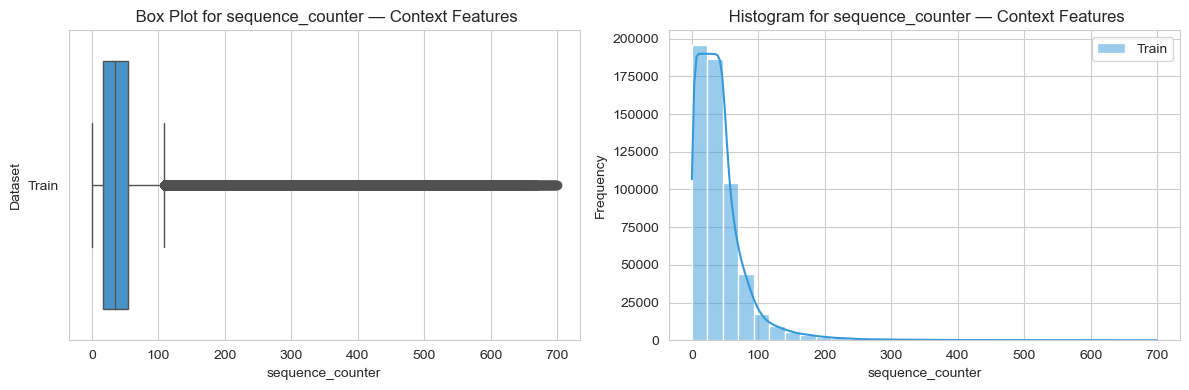

C:\Users\Atsuya_Watanabe\AppData\Local\Temp\ipykernel_38252\1035392353.py:36: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=data, x=variable, y="Dataset", palette=custom_palette)


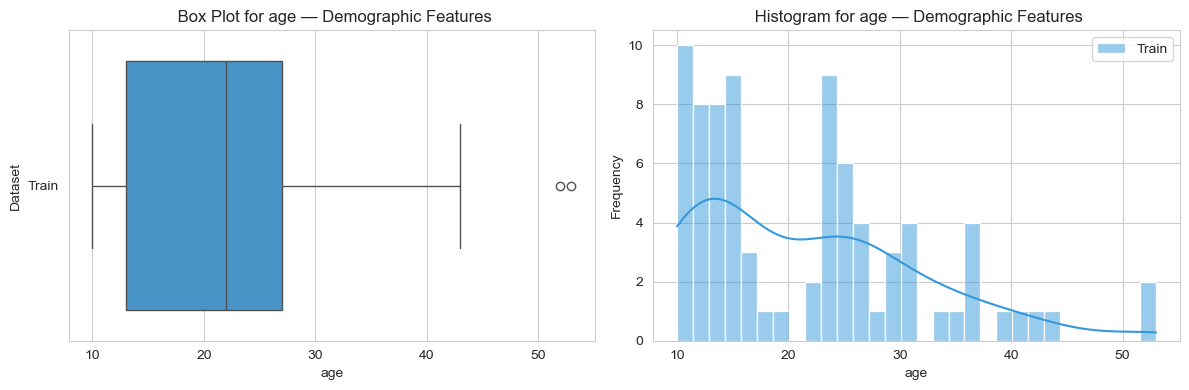

C:\Users\Atsuya_Watanabe\AppData\Local\Temp\ipykernel_38252\1035392353.py:36: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=data, x=variable, y="Dataset", palette=custom_palette)


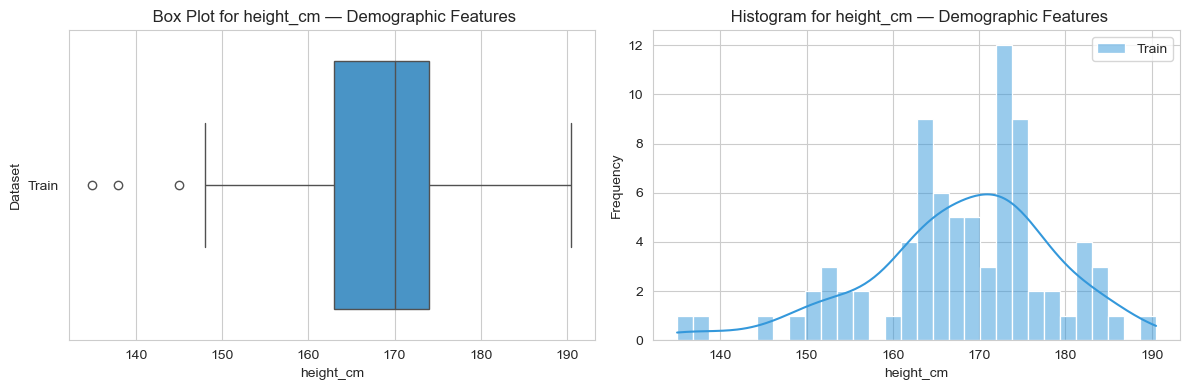

C:\Users\Atsuya_Watanabe\AppData\Local\Temp\ipykernel_38252\1035392353.py:36: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=data, x=variable, y="Dataset", palette=custom_palette)


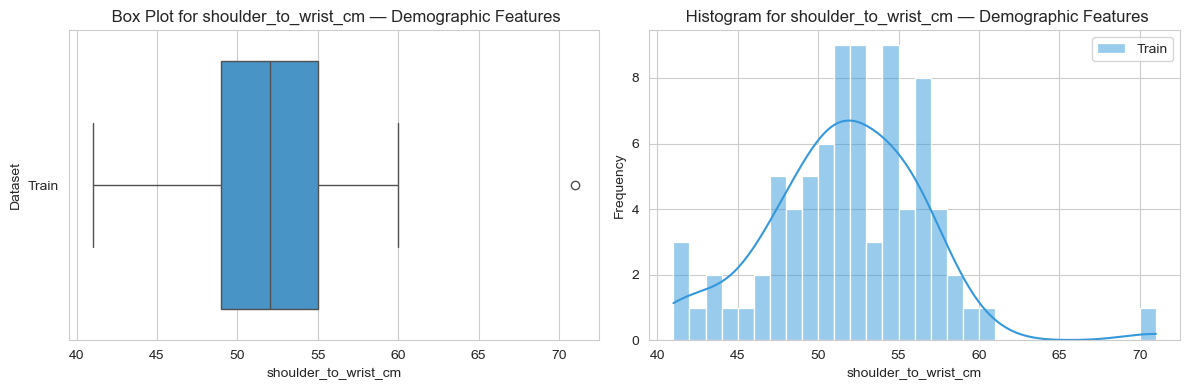

C:\Users\Atsuya_Watanabe\AppData\Local\Temp\ipykernel_38252\1035392353.py:36: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=data, x=variable, y="Dataset", palette=custom_palette)


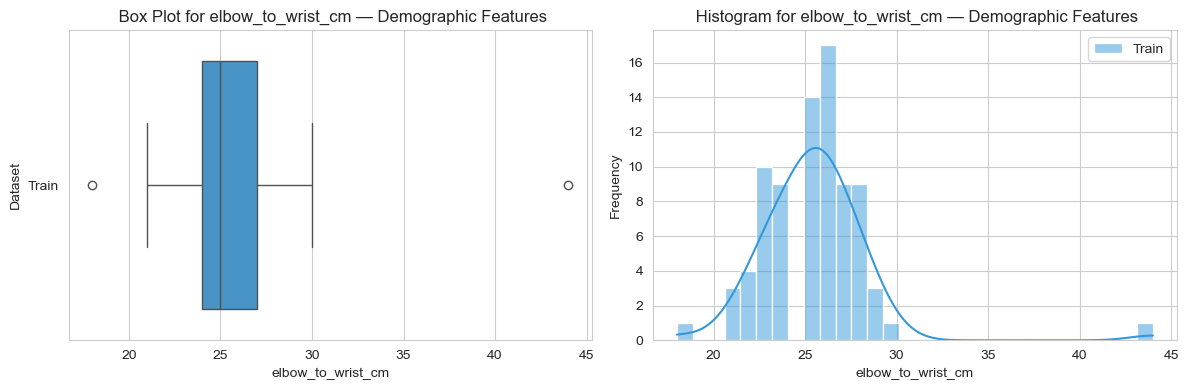

In [25]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

custom_palette = ['#3498db', '#e74c3c', '#2ecc71']
sensor_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')
categorical_columns = ['phase', 'behavior', 'orientation', 'sequence_type',
                       'adult_child', 'sex', 'handedness']
target_columns = ['gesture']
categorical_tracker = categorical_columns.copy()

def get_numerical_variables(df, excluded_prefixes, excluded_columns):
    return [col for col in df.columns 
            if pd.api.types.is_numeric_dtype(df[col])
            and not col.startswith(excluded_prefixes)
            and col not in excluded_columns]

# ONLY TRAIN SETS!
train_main = train_df.copy()
train_demo = train_dem_df.copy()

train_main['Dataset'] = 'Train'
train_demo['Dataset'] = 'Train'

main_data = train_main
demo_data = train_demo

main_numeric_vars = get_numerical_variables(main_data, sensor_prefixes, categorical_columns)
demo_numeric_vars = get_numerical_variables(demo_data, (), categorical_columns)

def create_variable_plots(variable, dataset_label, data):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f" Box Plot for {variable} — {dataset_label}")

    # Histogram
    plt.subplot(1, 2, 2)
    for label, color in zip(data['Dataset'].unique(), custom_palette):
        subset = data[data['Dataset'] == label]
        sns.histplot(data=subset, x=variable, kde=True, bins=30, label=label, color=color)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f" Histogram for {variable} — {dataset_label}")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot only train set context features
for var in main_numeric_vars:
    create_variable_plots(var, "Context Features", main_data)

# Plot only train set demographic features
for var in demo_numeric_vars:
    create_variable_plots(var, "Demographic Features", demo_data)

# --- Cleanup
train_main.drop('Dataset', axis=1, inplace=True)
train_demo.drop('Dataset', axis=1, inplace=True)

In [26]:
import numpy as np
import pandas as pd

# 1) Copy train and test so we don’t modify original DataFrames
train_temp = train_df.copy()
test_temp  = test_df.copy()

# 2) ACCELEROMETER: compute magnitude at each timestamp
train_temp['acc_mag'] = np.sqrt(
    train_temp['acc_x']**2 + train_temp['acc_y']**2 + train_temp['acc_z']**2
)
test_temp['acc_mag'] = np.sqrt(
    test_temp['acc_x']**2 + test_temp['acc_y']**2 + test_temp['acc_z']**2
)

# 3) ROTATION: compute “rotation angle” from quaternion w component
#    (Note: rot_w is in [-1,1], so arccos is valid. We ignore NaNs if any.)
train_temp['rot_angle'] = 2 * np.arccos(train_temp['rot_w'].clip(-1,1))
test_temp['rot_angle']  = 2 * np.arccos(test_temp['rot_w'].clip(-1,1))

# 4) Group by sequence_id and aggregate accelerometer summaries
acc_agg_funcs = {
    'acc_mag': ['mean', 'std', 'max']
}
train_acc_summary = train_temp.groupby('sequence_id').agg(acc_agg_funcs)
test_acc_summary  = test_temp.groupby('sequence_id').agg(acc_agg_funcs)

# Flatten column MultiIndex
train_acc_summary.columns = ['acc_mag_' + stat for stat in ['mean', 'std', 'max']]
test_acc_summary.columns  = ['acc_mag_' + stat for stat in ['mean', 'std', 'max']]

# 5) Group by sequence_id and aggregate rotation summaries
rot_agg_funcs = {
    'rot_angle': ['mean', 'std', 'max']
}
train_rot_summary = train_temp.groupby('sequence_id').agg(rot_agg_funcs)
test_rot_summary  = test_temp.groupby('sequence_id').agg(rot_agg_funcs)

train_rot_summary.columns = ['rot_angle_' + stat for stat in ['mean', 'std', 'max']]
test_rot_summary.columns  = ['rot_angle_' + stat for stat in ['mean', 'std', 'max']]

# 6) THERMOPILE: five sensors thm_1 … thm_5
thm_cols = [f"thm_{i}" for i in range(1, 6)]

# Define aggregation functions: mean + std
thm_agg_funcs = {col: ['mean', 'std'] for col in thm_cols}

train_thm_summary = train_temp.groupby('sequence_id').agg(thm_agg_funcs)
test_thm_summary  = test_temp.groupby('sequence_id').agg(thm_agg_funcs)

# Flatten MultiIndex columns
flattened_thm_cols = []
for sensor in thm_cols:
    for stat in ['mean','std']:
        flattened_thm_cols.append(f"{sensor}_{stat}")

train_thm_summary.columns = flattened_thm_cols
test_thm_summary.columns  = flattened_thm_cols

# 7) TIME‐OF‐FLIGHT: each sensor i has 64 pixel columns: tof_i_v0 … tof_i_v63
# We'll create one “tof_i_mean_at_ts” per timestamp, then aggregate per sequence.

def compute_tof_sequence_summary(df):
    # Initialize a dict to hold the per‐sequence DataFrames
    seq_summaries = {}

    for i in range(1, 6):
        # Build a list of columns for sensor i
        tof_cols = [f"tof_{i}_v{pix}" for pix in range(64)]
        # Replace -1 with NaN so they don't skew the mean; cast to float
        ts_grid = df[tof_cols].replace(-1, np.nan).astype(float)
        # Compute “mean across all 64 pixels” for each timestamp
        df[f"tof_{i}_mean_at_ts"] = ts_grid.mean(axis=1)
    
    # Now, group by sequence_id and compute per‐sequence mean & std of those means
    agg_dict = {f"tof_{i}_mean_at_ts": ['mean','std'] for i in range(1, 6)}
    summary = df.groupby('sequence_id').agg(agg_dict)
    # Flatten MultiIndex columns
    flat_cols = [f"tof_{i}_{stat}" for i in range(1, 6) for stat in ['mean','std']]
    summary.columns = flat_cols
    return summary

train_tof_summary = compute_tof_sequence_summary(train_temp)
test_tof_summary  = compute_tof_sequence_summary(test_temp)

# 8) Merge accel, rotation, thm, tof summaries (on sequence_id)
train_sensor_summary = (
    train_acc_summary
    .join(train_rot_summary, how='outer')
    .join(train_thm_summary, how='outer')
    .join(train_tof_summary, how='outer')
)

test_sensor_summary = (
    test_acc_summary
    .join(test_rot_summary, how='outer')
    .join(test_thm_summary, how='outer')
    .join(test_tof_summary, how='outer')
)

# 9) Add “Dataset” column so we can do box+hist side‐by‐side
train_sensor_summary['Dataset'] = 'Train'
test_sensor_summary['Dataset']  = 'Test'

# 10) Concatenate into one DataFrame for plotting
combined_sensor_summary = pd.concat(
    [train_sensor_summary, test_sensor_summary],
    axis=0
).reset_index(drop=True)

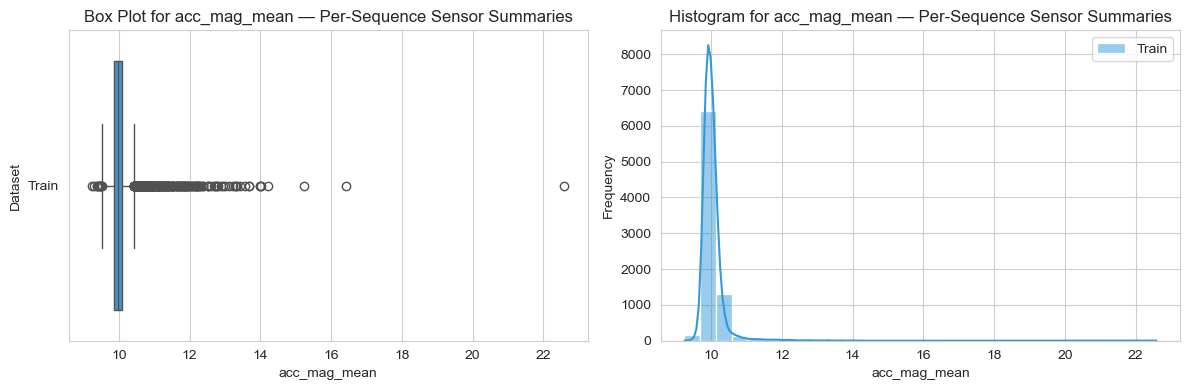

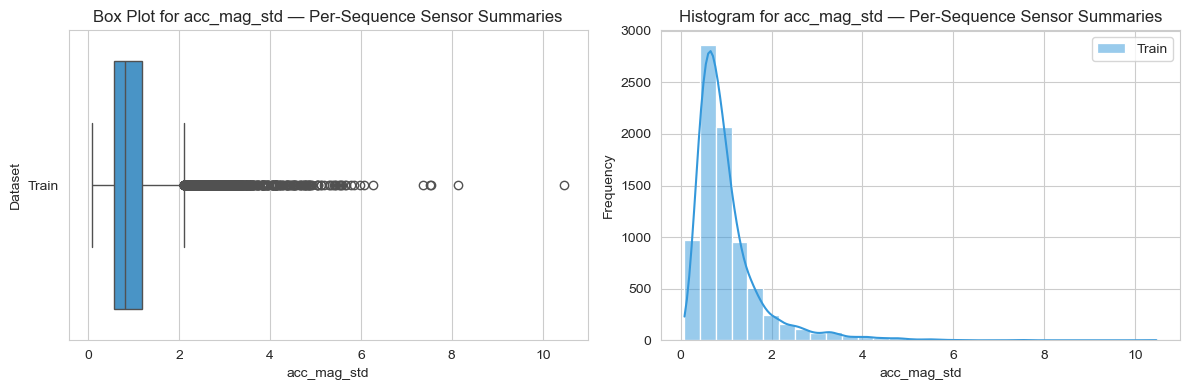

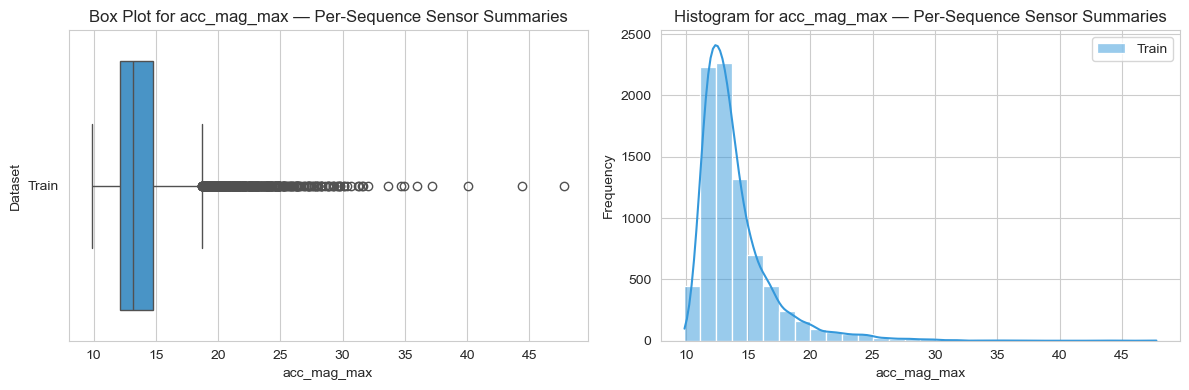

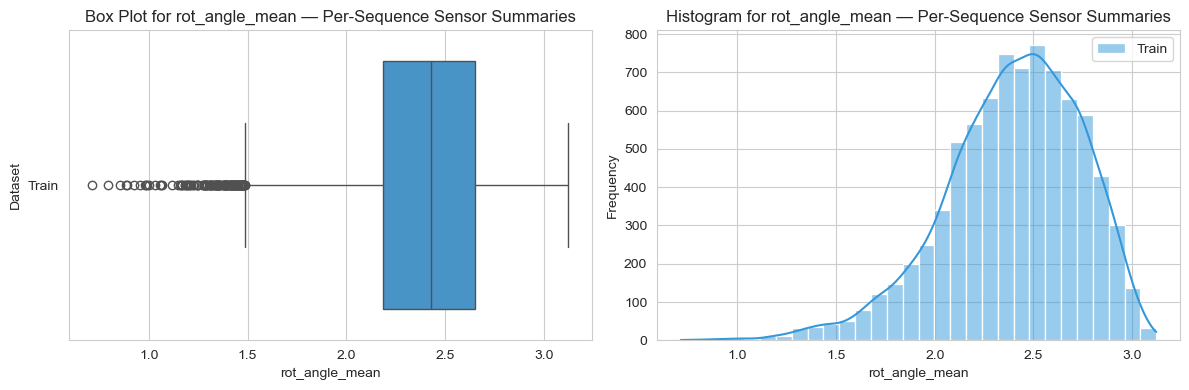

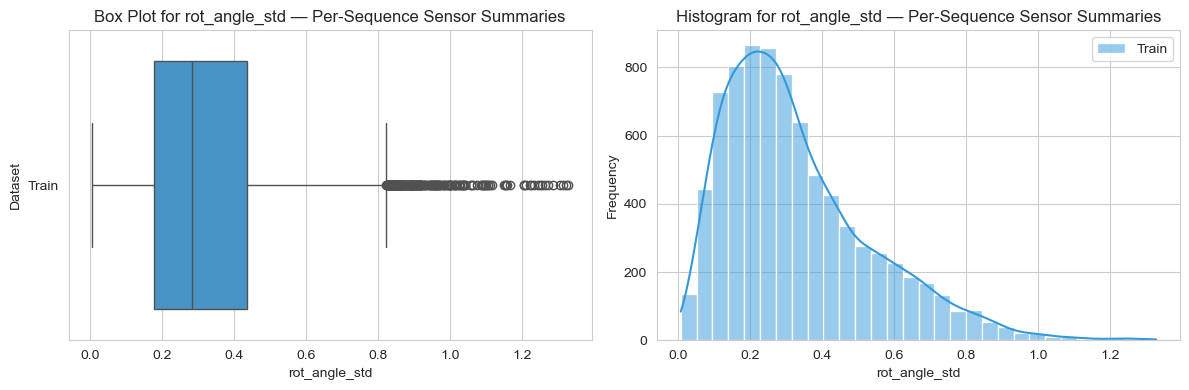

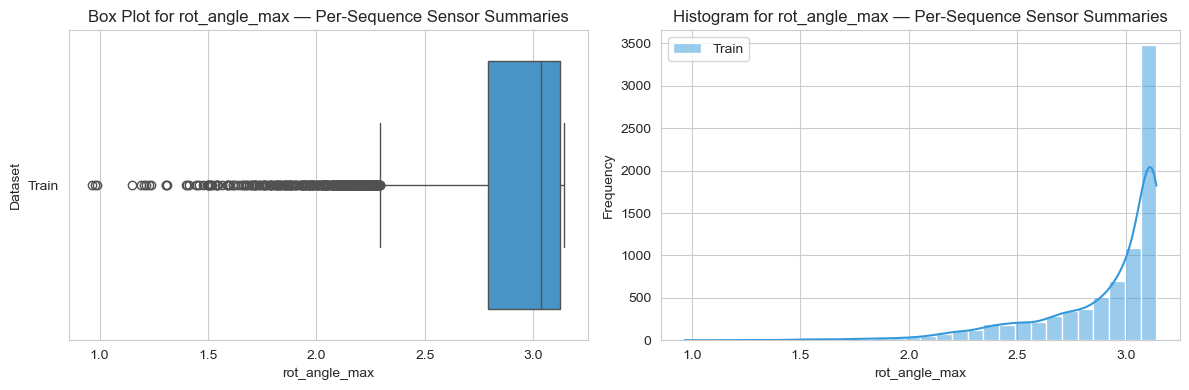

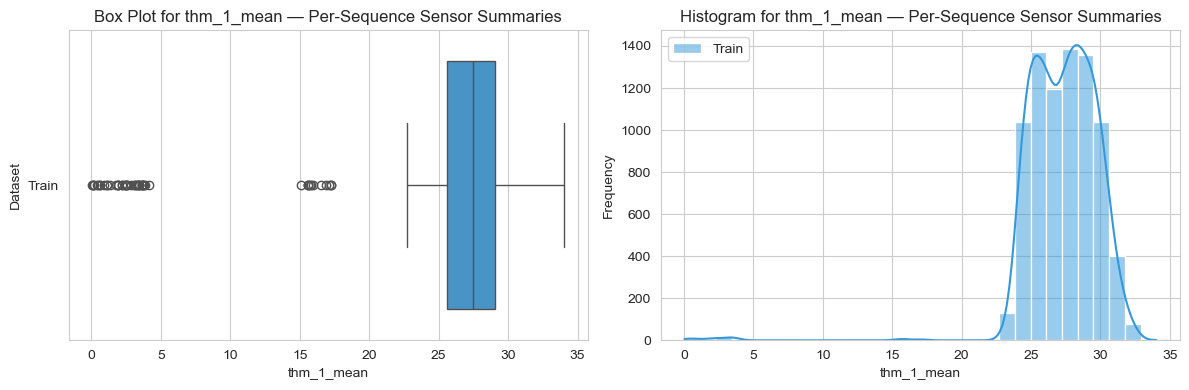

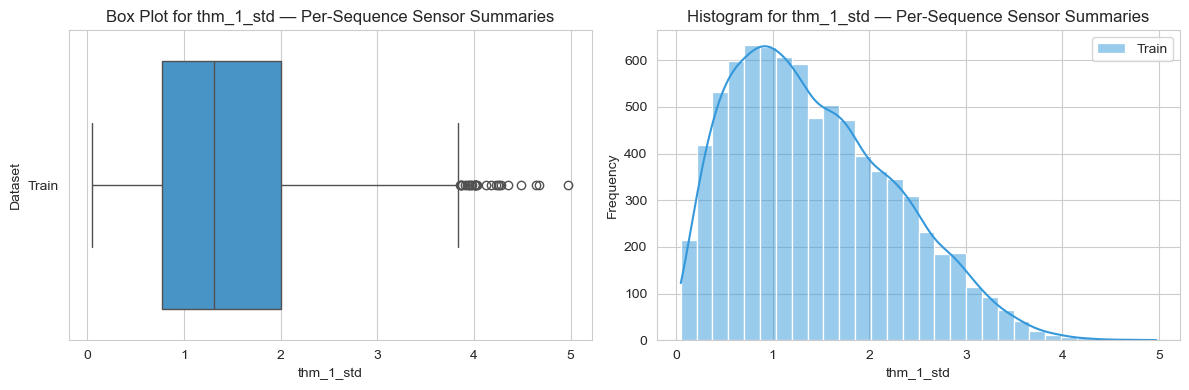

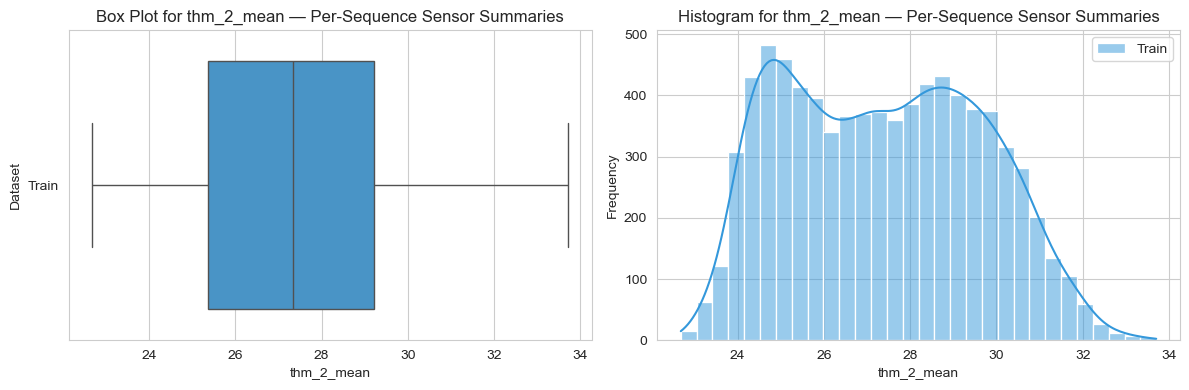

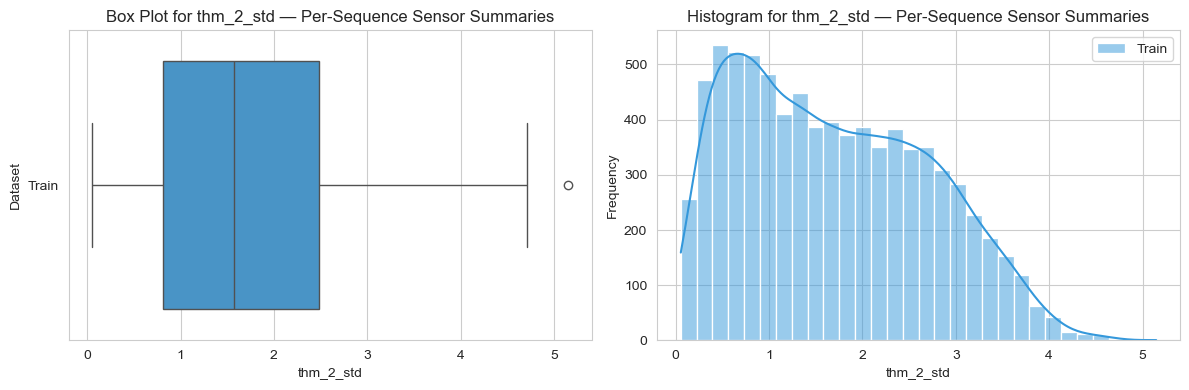

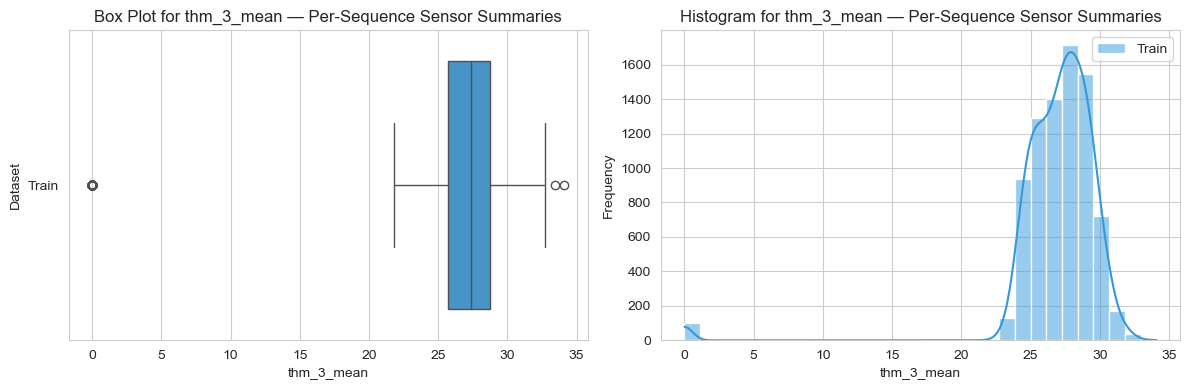

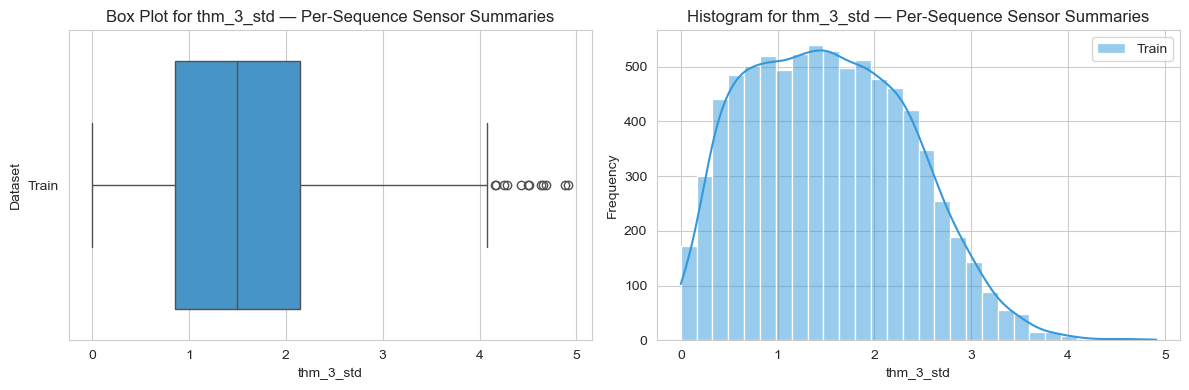

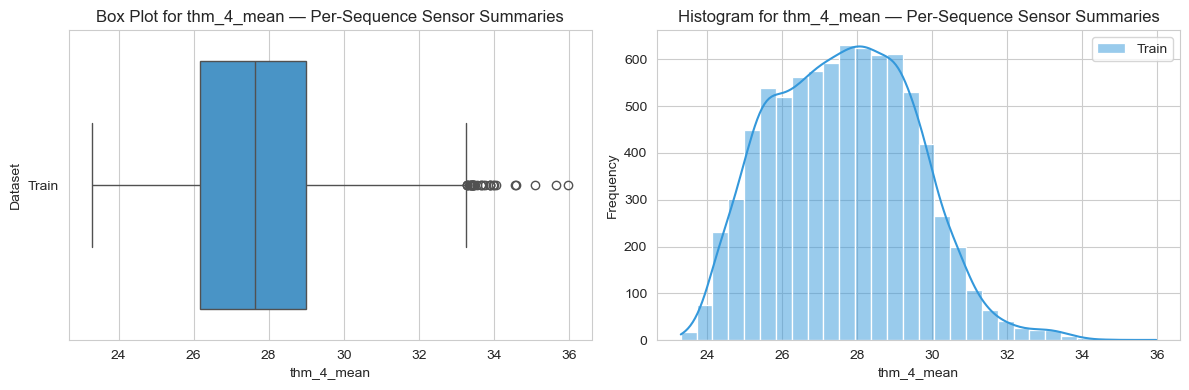

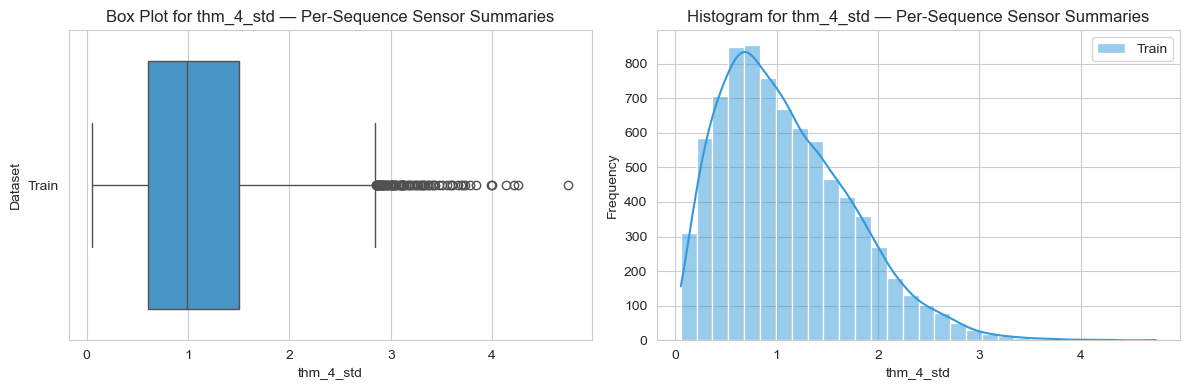

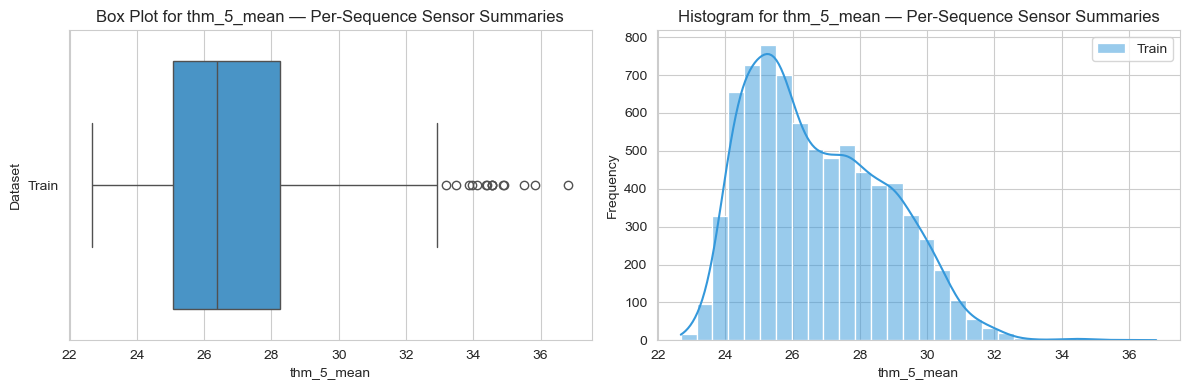

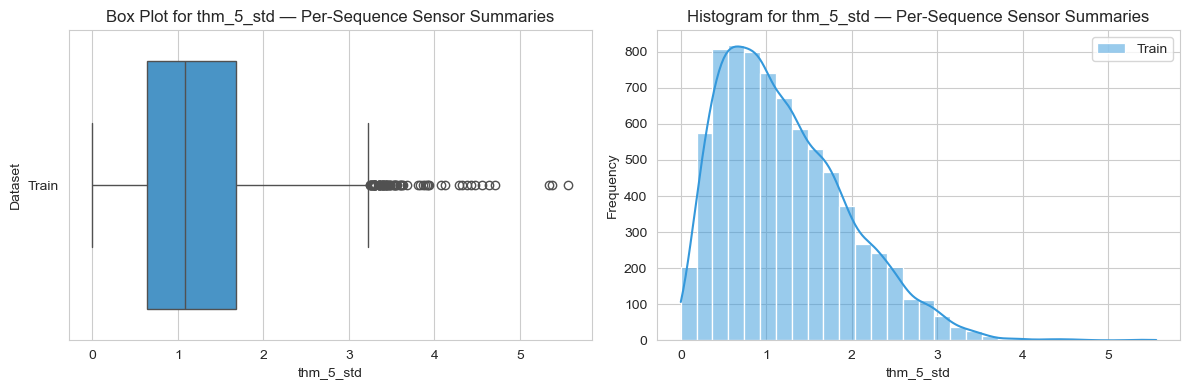

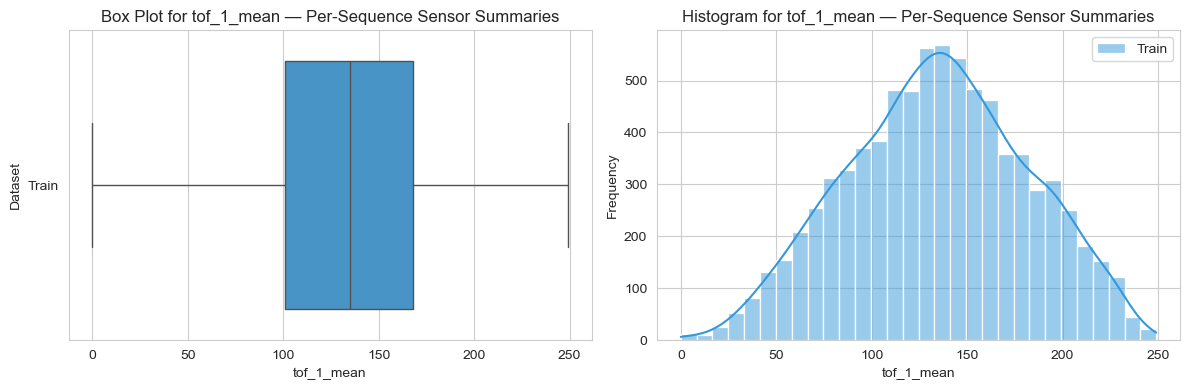

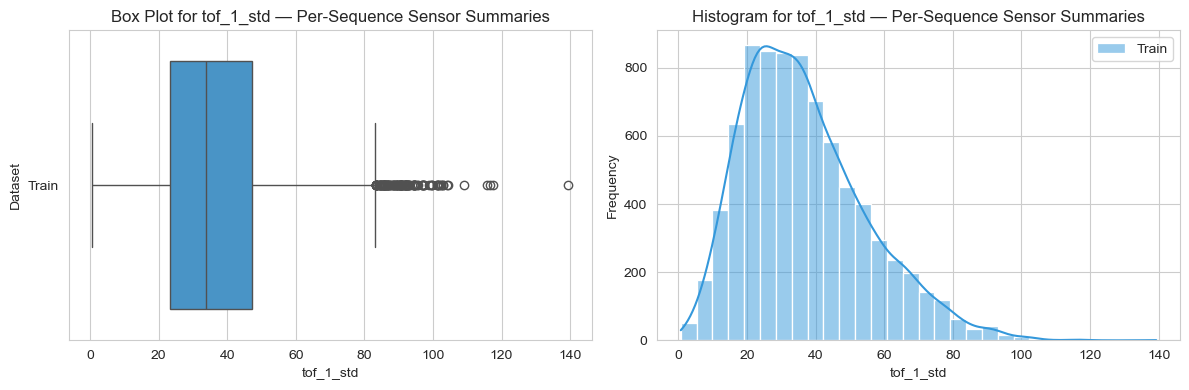

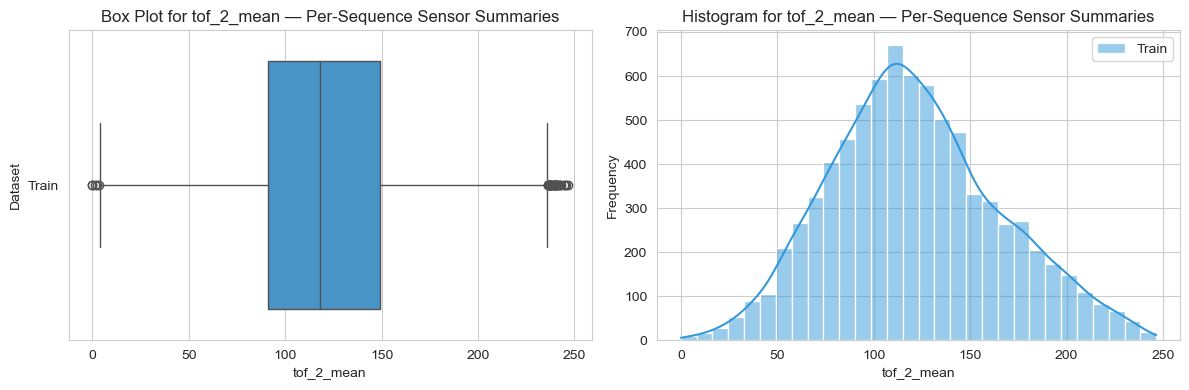

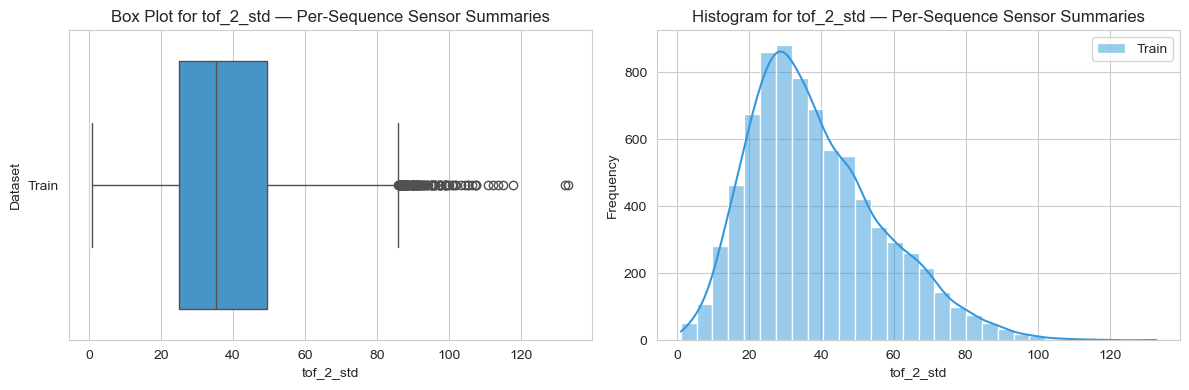

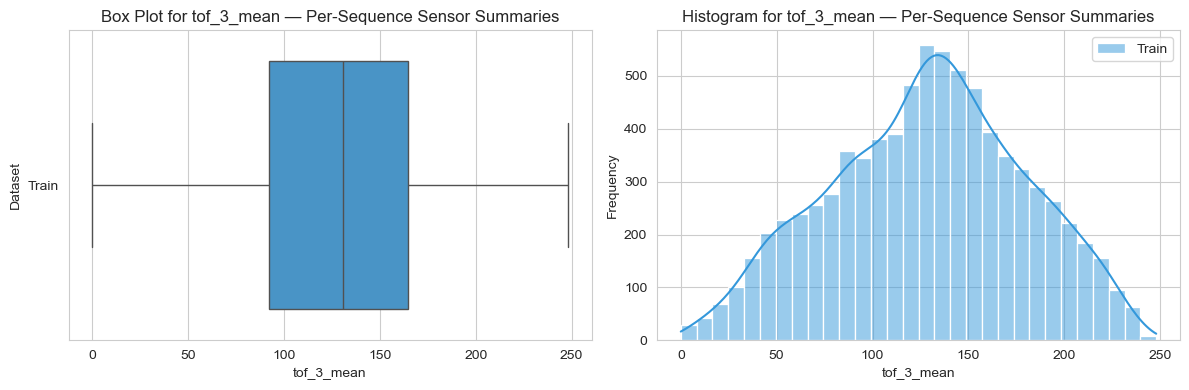

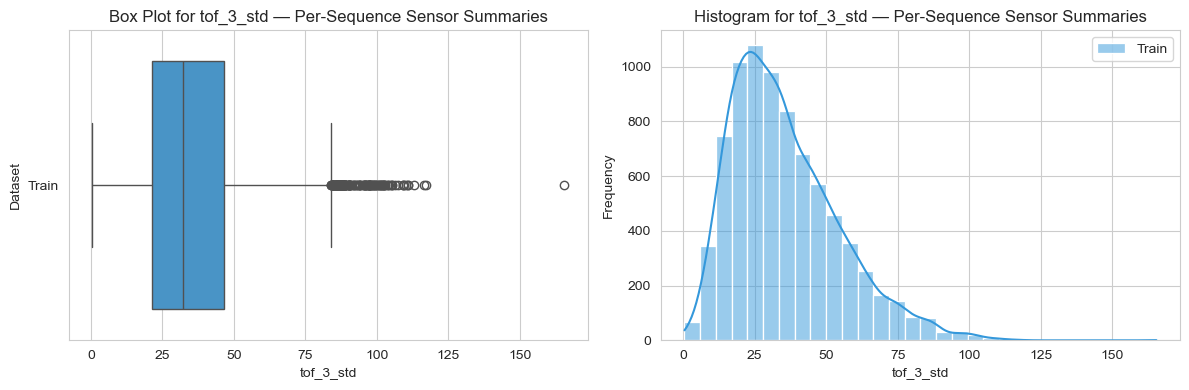

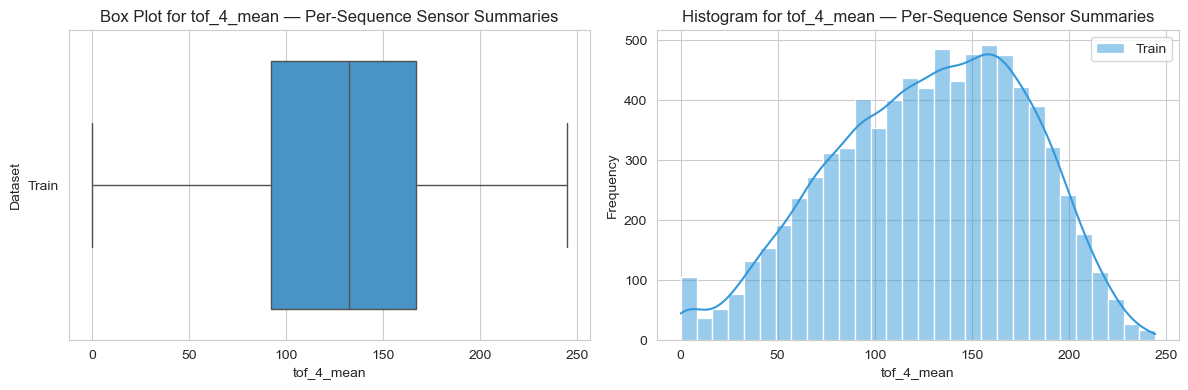

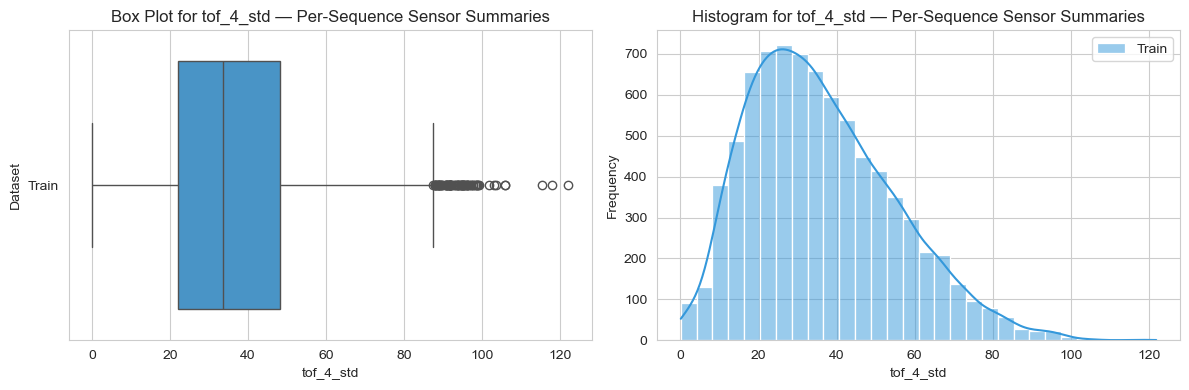

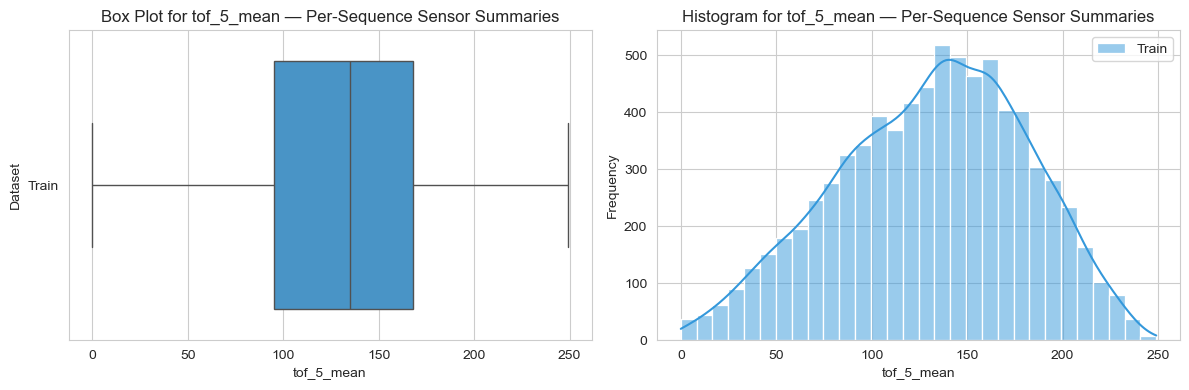

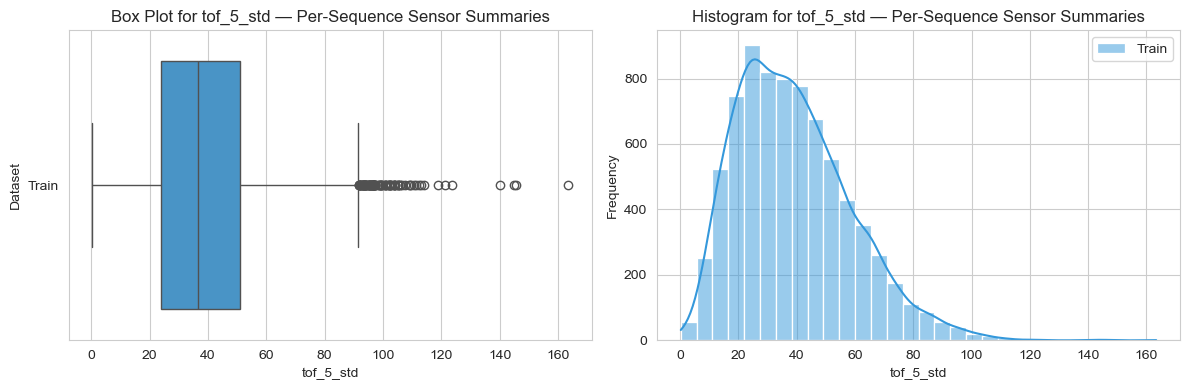

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Re-use your custom palette
custom_palette = ['#3498db', '#e74c3c', '#2ecc71']

# Filter only "Train" samples
train_sensor_summary = combined_sensor_summary[combined_sensor_summary['Dataset'] == 'Train']

# Define the plotting function (now uses only train_sensor_summary)
def create_sensor_summary_plots(variable, dataset_label, data):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box Plot (left)
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=variable, y="Dataset", palette=[custom_palette[0]])
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable} — {dataset_label}")

    # Histogram (right)
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=variable, kde=True, bins=30, color=custom_palette[0], label="Train")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} — {dataset_label}")
    plt.legend()

    plt.tight_layout()
    plt.show()

# List all sensor-summary variables (exclude 'Dataset')
sensor_summary_vars = [col for col in train_sensor_summary.columns if col != 'Dataset']

# Plot each
for var in sensor_summary_vars:
    create_sensor_summary_plots(var, "Per-Sequence Sensor Summaries", train_sensor_summary)

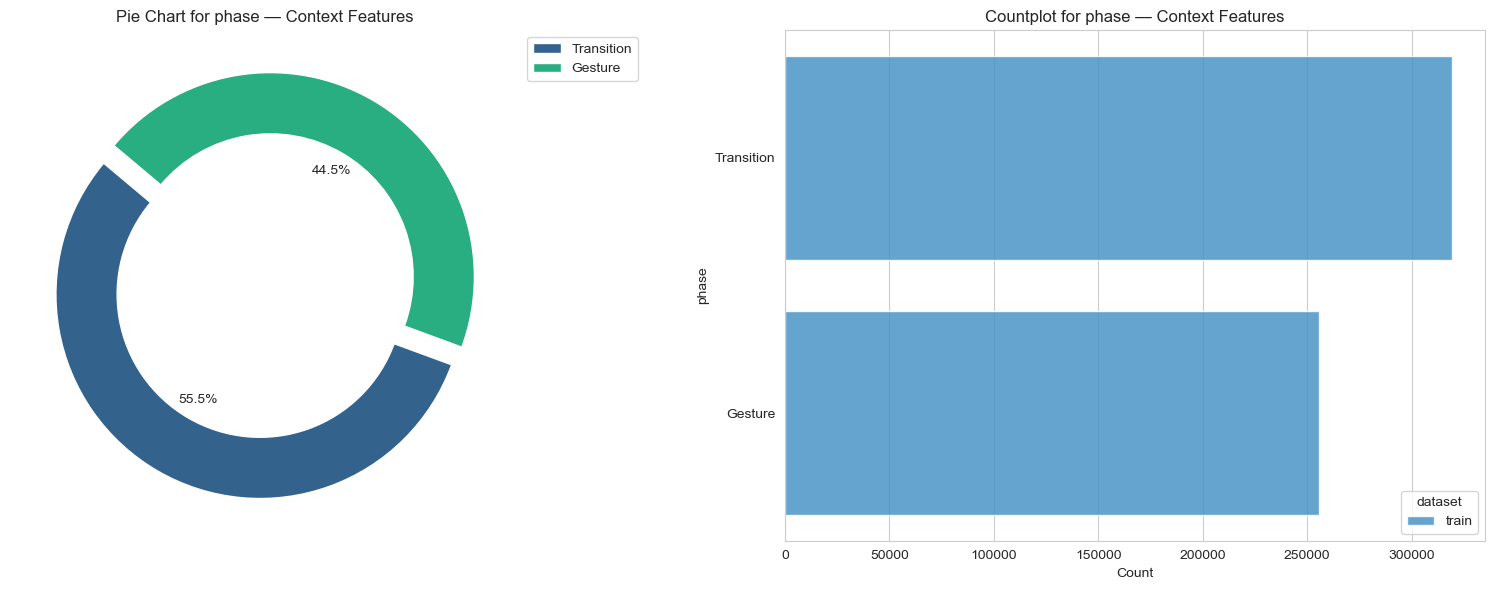

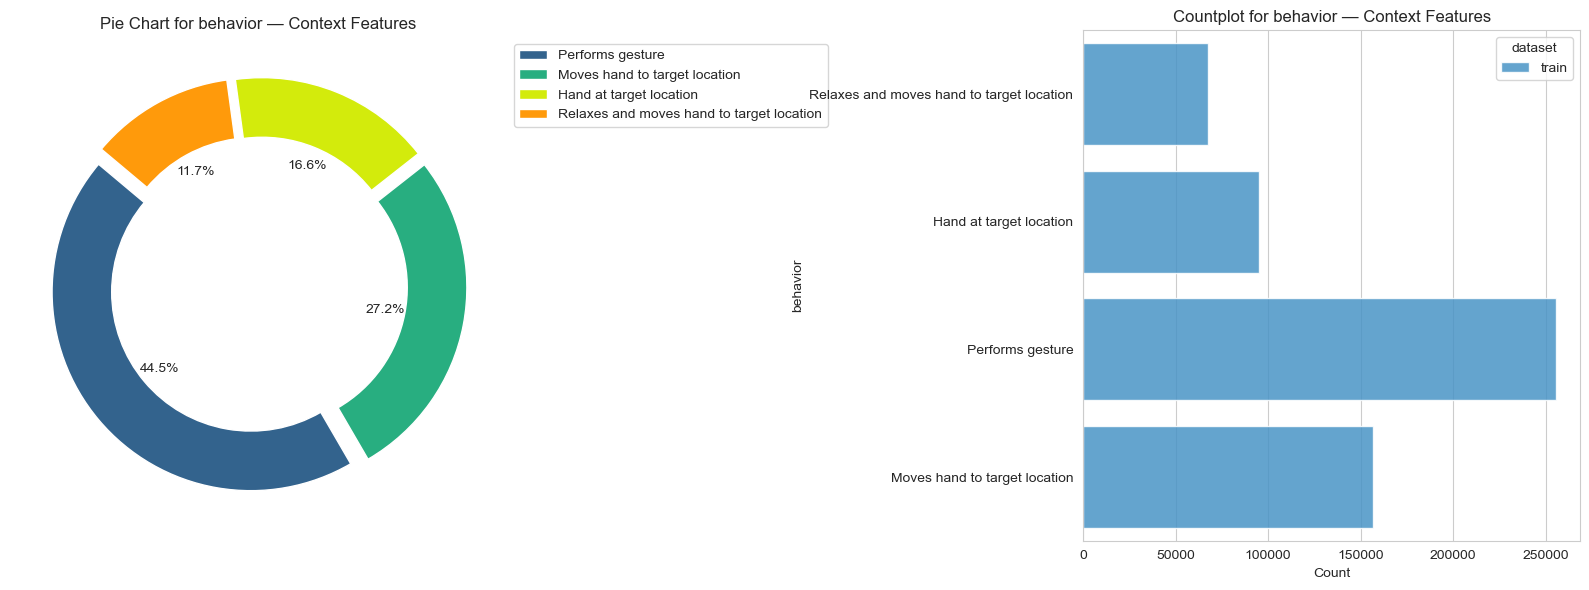

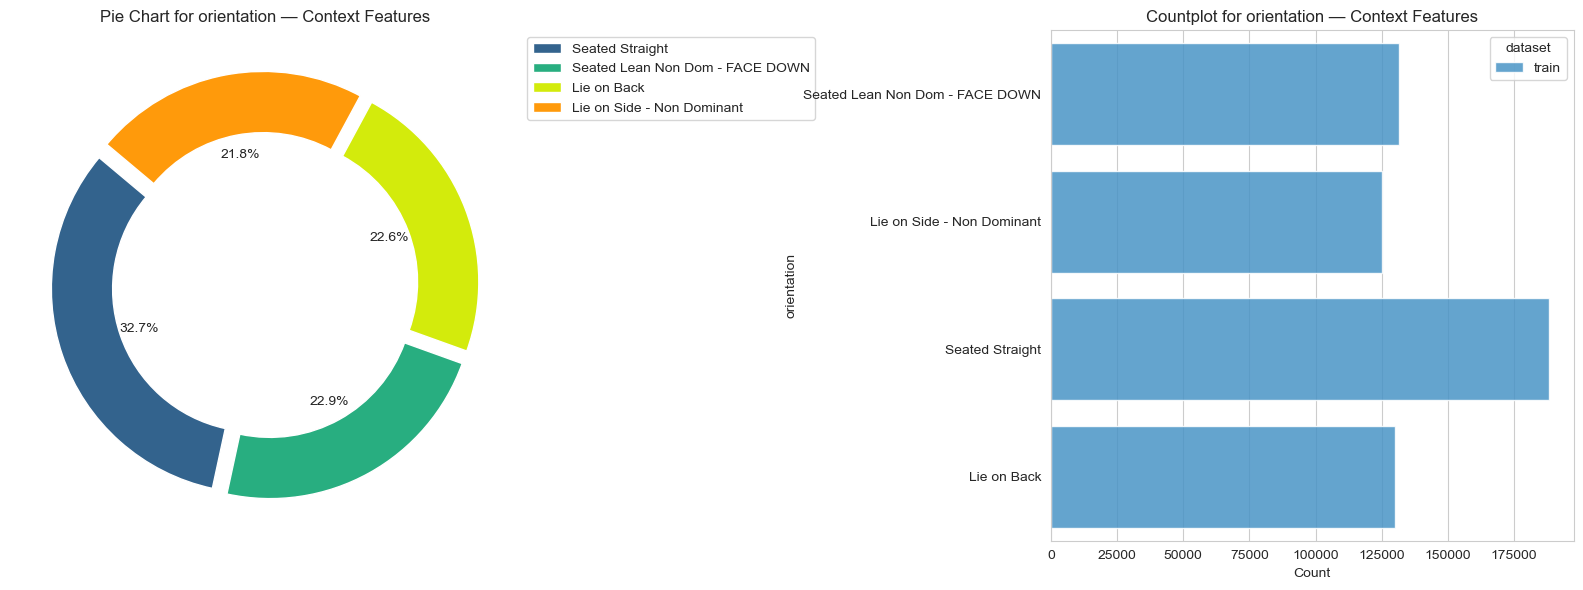

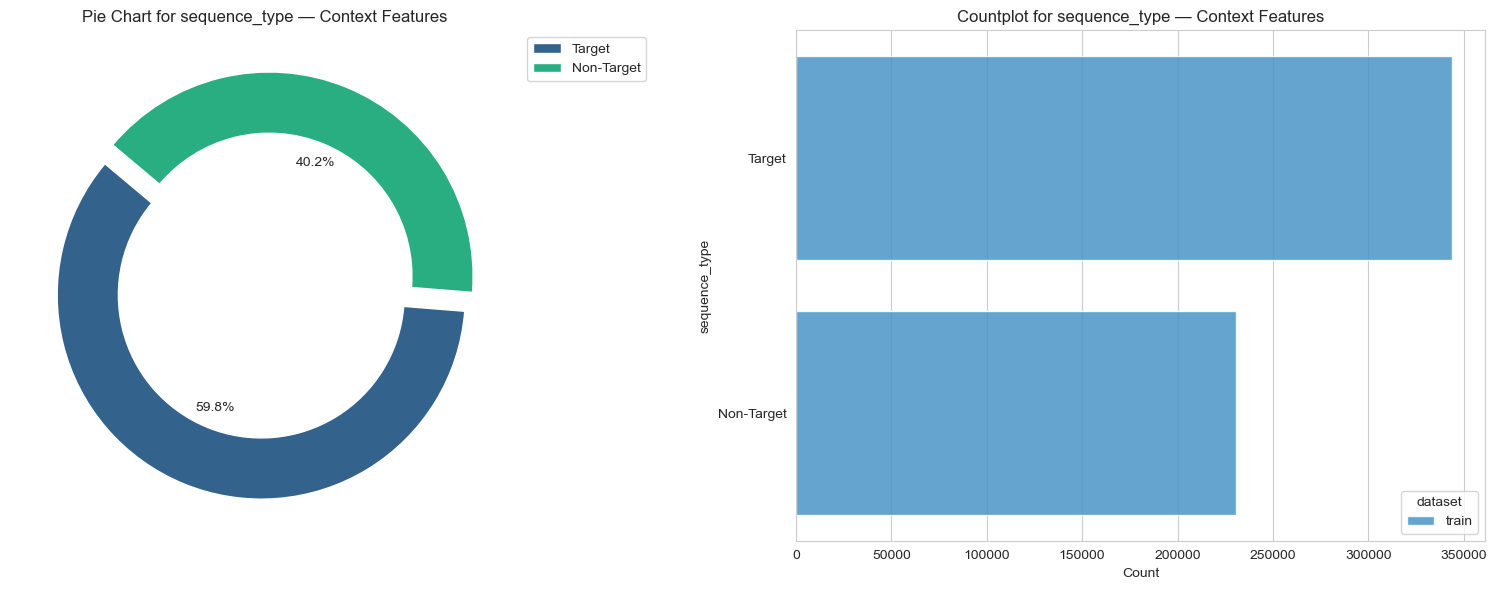

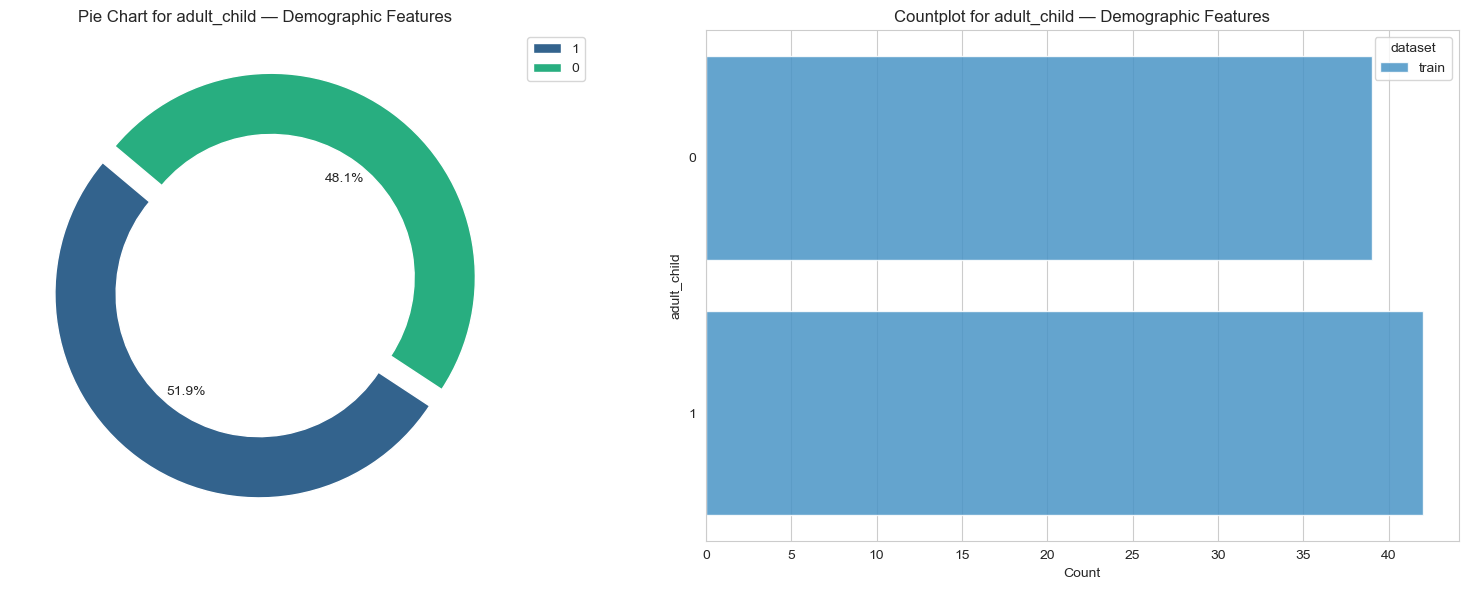

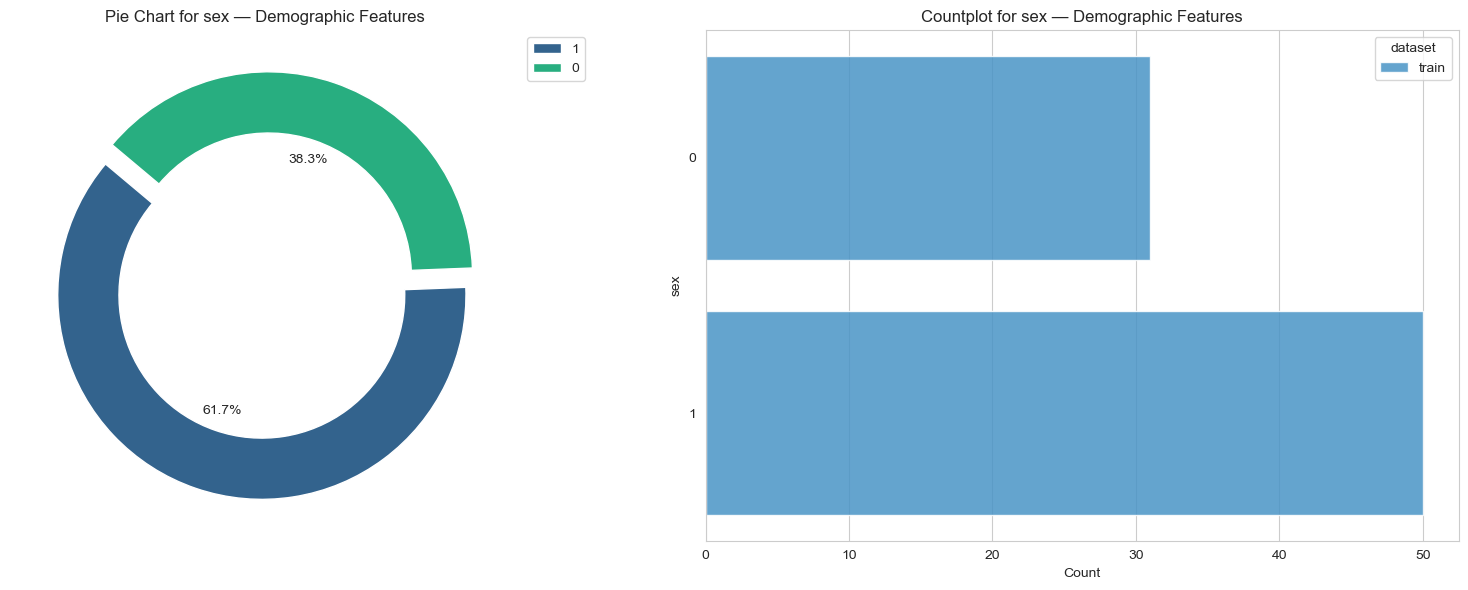

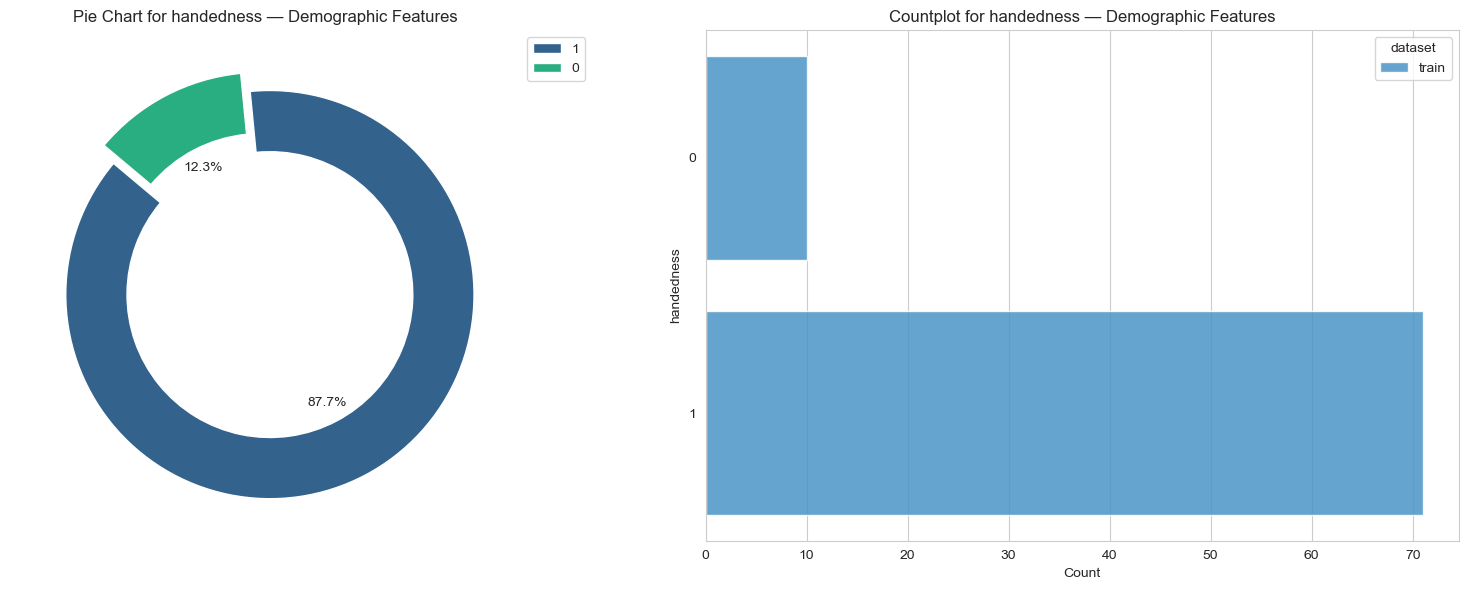

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Define palettes
pie_chart_palette = ['#33638d', "#164d39", '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779',
                     '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']
custom_palette = ['#3498db']  # Only Train

# 🔹 Categorical variables to analyze (excluding 'gesture')
categorical_variables = [col for col in categorical_tracker if col != 'gesture']

# --- Prep main dataset (train only)
train_main = train_df.copy()
train_main['dataset'] = 'train'
main_combined = train_main.copy()

# --- Prep demographic dataset (train only)
train_demo = train_dem_df.copy()
train_demo['dataset'] = 'train'
demo_combined = train_demo.copy()

# --- Unified plotting function
def create_categorical_plots(variable, data, source_name):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Pie Chart (left)
    plt.subplot(1, 2, 1)
    value_counts = data[variable].value_counts()

    # Collapse small categories
    threshold = 0.05 * value_counts.sum()
    filtered_values = value_counts.copy()
    filtered_values[value_counts < threshold] = 0
    filtered_values = filtered_values[filtered_values > 0]
    other_count = value_counts.sum() - filtered_values.sum()
    if other_count > 0:
        filtered_values['Other'] = other_count

    wedges, texts, autotexts = plt.pie(
        filtered_values,
        autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
        colors=pie_chart_palette[:len(filtered_values)],
        startangle=140,
        wedgeprops=dict(width=0.3),
        explode=[0.05 if p > 5 else 0 for p in filtered_values],
        textprops={'fontsize': 10}
    )

    plt.title("\n".join(textwrap.wrap(f"Pie Chart for {variable} — {source_name}", width=50)))
    plt.legend(filtered_values.index, loc="upper left", bbox_to_anchor=(1, 1))

    # Horizontal Countplot (right)
    plt.subplot(1, 2, 2)
    sns.countplot(
        data=data,
        y=variable,
        hue='dataset',  # still present, but only "train"
        palette=custom_palette,
        alpha=0.85
    )
    plt.ylabel(variable)
    plt.xlabel("Count")
    plt.title("\n".join(textwrap.wrap(f"Countplot for {variable} — {source_name}", width=50)))
    plt.tight_layout()
    plt.show()

# --- Plot all categorical variables from main dataset (train only)
for var in categorical_variables:
    if var in main_combined.columns:
        create_categorical_plots(var, main_combined, "Context Features")

# --- Plot all categorical variables from demographic dataset (train only)
for var in categorical_variables:
    if var in demo_combined.columns:
        create_categorical_plots(var, demo_combined, "Demographic Features")

# Cleanup
train_main.drop('dataset', axis=1, inplace=True)
train_demo.drop('dataset', axis=1, inplace=True)
